<a href="https://colab.research.google.com/github/JasonJeng/Lab7-Geoparsing/blob/main/IDCE30274_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IDCE30274 Lab7

Zexing Zheng

Python Version 3

05/26/2021

This lab focues on geoparsing, which refers to the process of extracting place-names from text and matching those names with spatial coordinates. Geoparsing is a specific kind of procedure known in geography as toponym resolution. However, there is a fairly big difference between the two terms. Toponym resolution focuses on deriving geographic information from structured, unambiguous references, such as the post office’s use geocoded state abbreviations for routing. 

In [2]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules


False

In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

# **Scraping Our Text from the Web**
The first thing to do get a copy of The Innocents Abroad. The full text is freely available online, under open license, through Project Gutenberg. We'll use the requests object from the urllib module, pass the url for the raw .txt, and decode it in utf-8, which is a common form HTML document encoding.

In [ ]:
url = 'http://www.gutenberg.org/files/3176/3176-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

# **Geoparsing!**
Now that I know I've scraped what I've expected to scrape, we'll use GeoText, which allows us to extract city names.

In [ ]:
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

In [ ]:
geolocator = Nominatim(user_agent='inklotuszheng@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon


In [ ]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)


In [ ]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

Putting these point objects back into a dataframe allows us to plot them easily. Instead of a pandas dataframe, we'll use a geopandas dataframe, which can easily handle these types of objects. The code below adds a column to the dataframe called geometry that includes the flipped coordinates. We'll be using the epsg:4326 coordinate system, which is basically WGS84. If you're a projection nerd, then you'll enjoy this blog post about this by the fabulous Lyzi Diamond.

In [ ]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()


In [12]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84.cpg
Saving Countries_WGS84.dbf to Countries_WGS84.dbf
Saving Countries_WGS84.prj to Countries_WGS84.prj
Saving Countries_WGS84.shp to Countries_WGS84.shp
Saving Countries_WGS84.shx to Countries_WGS84.shx


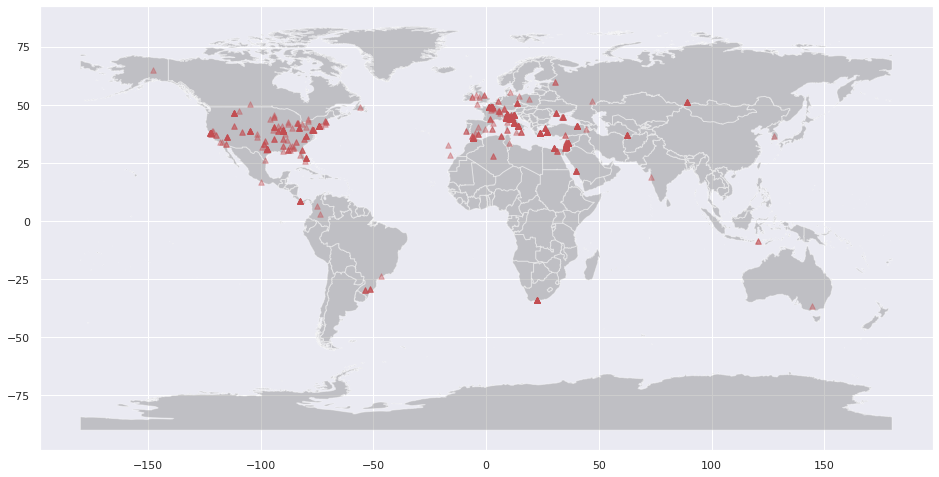

In [18]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

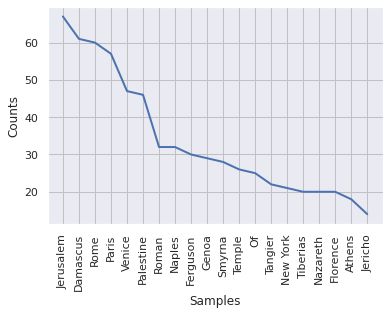

In [14]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20


# **Moby Dick; Or, The Whale by Herman Melville**
https://www.gutenberg.org/files/2701/2701-0.txt

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

Please enter a text document (URL) from Project Gutenberg.org. The format should start with https://www.gutenberg.org/ : https://www.gutenberg.org/files/2701/2701-0.txt


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


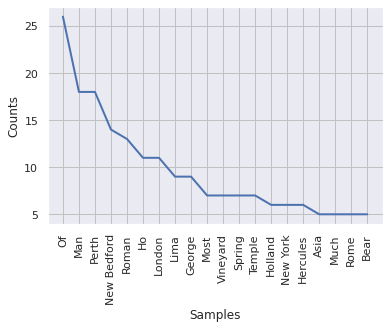

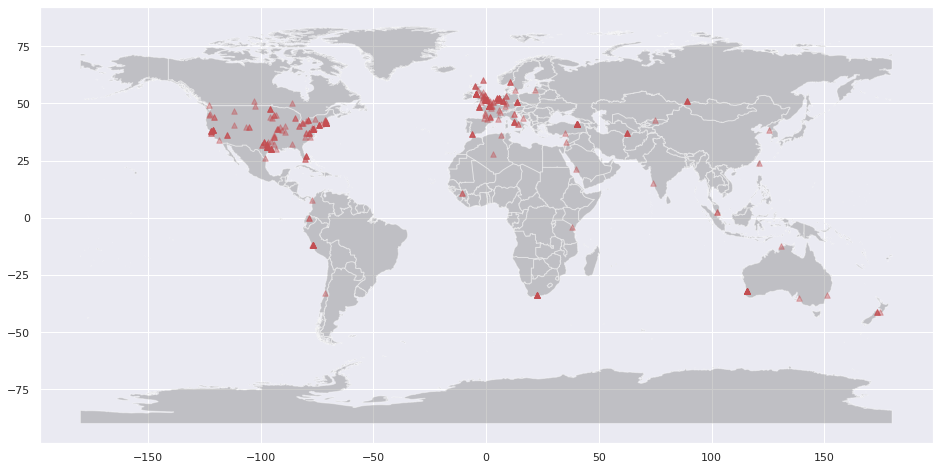

In [25]:
name = input("Please enter a text document (URL) from Project Gutenberg.org. The format should start with https://www.gutenberg.org/ : ")  #https://www.gutenberg.org/files/2701/2701-0.txt
def URL():
  url = name
  response = request.urlopen(url)
  raw = response.read().decode('utf8')
  places = GeoText(raw)
  cities = list(places.cities)
  geolocator = Nominatim(user_agent='inklotuszheng@gmail.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

  lat_lon = []
  for city in cities:
    try:
      location = geolocator.geocode(city)
      if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
  crs = {'init': 'epsg:4326'}

  # convert df to geo df
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
  %matplotlib inline
  sns.set()

  # Create freq dist and plot
  freqdist1 = nltk.FreqDist(cities)
  freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

  countries_map = gpd.read_file('Countries_WGS84.shp')

  f, ax = plt.subplots(figsize=(16, 16))
  countries_map.plot(ax=ax, alpha=0.4, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)
  #Import datavis libraries
  # Figures inline and set visualization style



URL()
